# 분양가 예측 모형

## 1. 주제

- 본 프로젝트의 목적은 아파트 분양가격과 관련이 높을것으로 판단되는 데이터를 수집하여 분양가격을 예측할 수 있는 모형을 제안하는 것에 있다.

- 본 프로젝트는 FAST CAMPUS "데이터 사이언스 취업완성 SCHOOL" 의 **박두진 강사님** 지도하에 **최태병, 문다영, 손형진**이 팀을 이루어 진행하였다.

## 2. 연구문제

- 금리, 소비자물가지수, 산업생산지수, 부동산 정책, 주택정책 검색량, 아파트 사이즈를 바탕으로 최적의 분양가격을 예측할 수 있는 회귀모델을 제안한다.

## 3. 연구방법

아래 그림은 본 프로젝트의 데이터 분석 과정을 보여준다.

![연구과정](images/process.PNG)

## 4. 데이터 수집

### 4.1 데이터 수집 근거

- 임대봉(2007)의 논문 "주택가격 상승요인과 대책방안"을 바탕으로 주택가격가 관계가 강할 것으로 예측되는 금리, 소비자물가지수, 산업생산지수, 주택정책을 강사님이 제안한 데이터에 추가하였다. 단, 주택정책의 경우 주택정책이 발표되는 시기에 "주택정책"이라는 검색이 많아 질 것으로 가정하여 구글 트랜드 데이터로 대체하였다. 아래 그림은 임대봉(2007)이 제안한 주택가격에 영향을 주는 독립변수별 오차수정모형 추정결과를 보여준다.

![오차수정모형 추정결과(출처: 임대봉(2007, p23)](images/article.PNG)

### 4.2 데이터 소개

#### 과제 데이터

- house : 전국 평균 분양가격(2019년 9월)(출처 : [공공데이터 포탈(DATA)](https://www.data.go.kr/dataset/3035522/fileData.do))
  
#### 추가 데이터

- cofix : 금리  (출처 : [은행연합회소비자포탈](https://portal.kfb.or.kr/fingoods/cofix.php))
    - 은행들이 기준금리에 자금 조달 비용을 반영해 산출하는 주택담보대출 금리
- cpi : 소비자물가지수(출처 : [국가통계포탈(KOSIS)](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J17002&conn_path=I2))
    - 일반 도시 가계가 소비생활을 영위하기 위하여 구입하는 소비재와 서비스의 가격변동을 나타내는 지수
    - 2017년 = 100
- iaip : 산업생산지수  (출처 : [이나라지표](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=2838))
    - 우리나라 경제전체의 모든 산업을 대상으로 재화와 용역에 대한 생산활동의 흐름과 변화를 월별지수로 나타낸 것
    - 2015 년 = 100
- googletrend : 구글 "주택정책" 검색 비율 (출처 : [구글트렌드](https://trends.google.co.kr/trends/?geo=KR))
    - 주택정책에 대한 이슈를 수치화하기 위한 데이터로 사용
    - 2015년 1월~ 2019년 9월 중 가장 검색을 많이했을때의 검색량 = 100

## 5. 데이터 전처리

### 5.1 데이터 불러오기 및 컬럼, 값 수정

1. 컬럼 및 값 영문화
    - house
        - 컬럼 변경  

         |한글 컬럼|지역명|규모구분|연도 |월    |분양가격|
         |------|-----|------|----|-----|------|
         |영문 컬럼|city|size  |year|month|Price |

        - 규모구분(size) 실수형 자료로 수정  

         |수정 전|전체|전용면적60㎡이하|전용면적 60㎡초과 85㎡이하|전용면적 85㎡초과 102㎡이하|전용면적 102㎡초가|
         |---|---|---|---|---|---|
         |수정 후|total|1|2|3|4|  


    - cofix  

     |한글 컬럼|공시일|신규취급액기준cofix|
     |---------|------|-------------------|
     |영문 컬럼|date  |cofix              |  

    - cpi  

     |한글 컬럼|기간|총지수     |
     |---------|----|-----------|
     |영문 컬럼|date|total_index|  

    - iaip  

     |한글 컬럼|index|전업생산지수(원지수)|
     |---------|-----|--------------------|
     |영문 컬럼|date |origin_index        |  

In [3]:
import datetime  # datetime 패키지를 사용하여 불러왔습니다. 나머지 패키지는 startup 파일로 지정해 두었습니다.

In [4]:
# 데이터 불러오기
house_df = pd.read_csv(
    "datas/주택도시보증공사_전국 평균 분양가격(2019년 9월).csv", encoding='euc-kr')
cofix_df = pd.read_csv(
    "datas/Cofix.csv", encoding='euc-kr', header=1)
cpi_df = pd.read_csv(
    "datas/cpi.csv", encoding='euc-kr', header=0)
iaip_df = pd.read_csv(
    "datas/iaip.csv", encoding='euc-kr', header=0)
googletrend_df = pd.read_csv(
    "datas/googletrend.csv", encoding='utf-8')

In [5]:
# 컬럼 선택 및 컬럼 및 값 영문화
house_df.columns = ["city", "size", "year", "month", "price"]
cofix_df = cofix_df.iloc[:, 1:3]
cofix_df.columns = ["date", "cofix"]
cpi_df = cpi_df.iloc[:, 0:2]
cpi_df.columns = ["date", "total_index"]

In [6]:
iaip_df = iaip_df.T.iloc[:, 0:1].reset_index()
iaip_df = iaip_df.drop(iaip_df.index[0])
iaip_df.columns = ["date", "origin_index"]

In [7]:
# size 값 수정 (단, 'city' 항목의 경우 차후 서울 부분만 추출하여 사용하기 때문에 영문화 하지 않음)
def size_rename(size):
    if size == "전체":
        return "total"
    if size == "전용면적 60㎡이하":
        return 1
    if size == "전용면적 60㎡초과 85㎡이하":
        return 2
    if size == "전용면적 85㎡초과 102㎡이하":
        return 3
    if size == "전용면적 102㎡초과":
        return 4


house_df["size"] = house_df["size"].apply(size_rename)
house_df.tail(2)

,city,size,year,month,price
4078,제주,3,2019,9,NaN
4079,제주,4,2019,9,3601


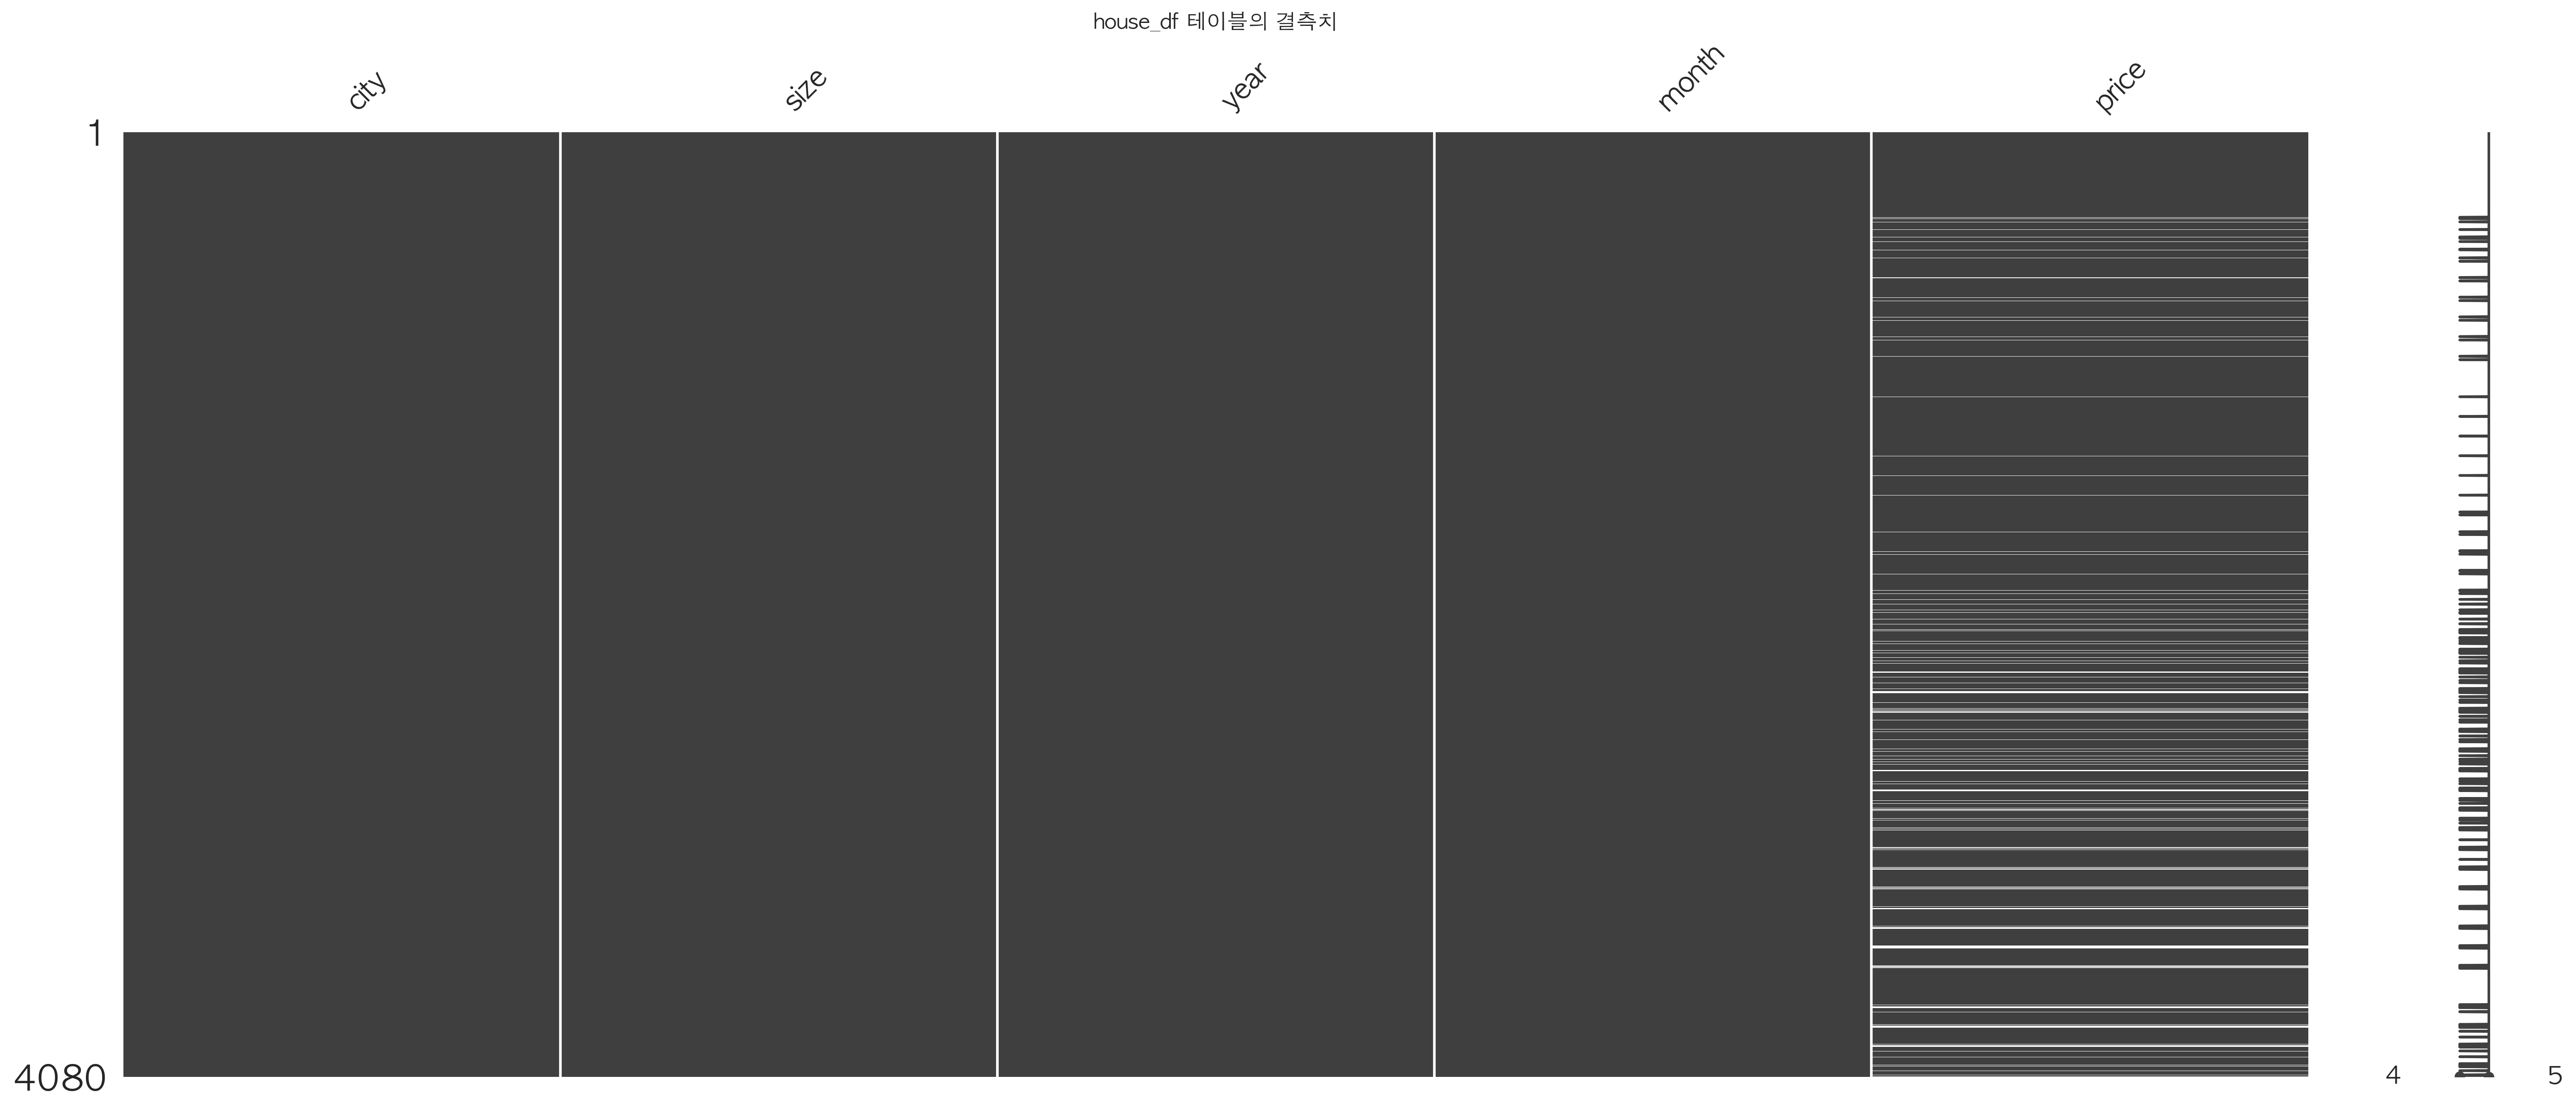

In [8]:
import missingno as msno

msno.matrix(house_df)
plt.title("house_df 테이블의 결측치")
plt.show()

In [9]:
# house 테이블에 price 값 오타 확인
chaos_data = set()
for a in house_df["price"]:
    try:
        float(a)
    except:
        chaos_data.add(a)

print(sorted(chaos_data))

['  ', '-', '2,076', '2,077', '2,192', '2,200', '2,203', '2,223', '2,242', '2,258', '2,259', '2,271', '2,283', '2,291', '2,309', '2,319', '2,363', '2,370', '2,383', '2,389', '2,390', '2,403', '2,407', '2,441', '2,491', '2,504', '2,581', '2,621', '2,693', '2,720', '2,723', '2,751', '2,760', '2,761', '2,763', '2,776', '2,782', '2,790', '2,812', '2,838', '2,865', '2,888', '2,895', '2,904', '2,914', '2,985', '3,067', '3,300', '3,306', '3,330', '3,374', '3,378', '3,445', '3,466', '3,477', '3,527', '3,557', '3,560', '3,647', '3,654', '3,658', '3,714', '3,720', '3,726', '3,777', '3,778', '3,820', '3,883', '4,027', '4,835', '5,380', '5,899', '6,657', '6,880', '6,931', '7,311']


In [10]:
# price 값 결측값, 오타 수정
house_df["price"] = house_df["price"].replace('', np.nan).replace(
    '  ', np.nan).replace('-', np.nan).str.replace(',', '')
house_df.dropna(inplace=True)
house_df["price"] = house_df["price"].astype(int)

### 5.2 키값 생성 및 데이터 병합

#### 5.2.1 키값 생성
- 각 데이터의 날짜 형식을 **"2019-01-01"**과 같이 통일 하고자 한다(해당 데이터의 날짜 형식은 달 단위로 기입 되어 있으나, 차우 datetiem 모듈 사용을 위해 01로 통일된 날 단위를 추가하였다.)

|데이터명   |원 날짜표시형태      |변환 방식                              |코드요약|
|-----------|---------------------|---------------------------------------|--------|
|house      | 연도 : 2019/ 월 : 9 | (연도 X 100) + 월 +01, 데이터 슬라이싱|house_df["year"]*100+house_df["month"] ->house_df["date"].str[0:4] + "-"+house_df["date"].str[4:6]+"-01"|
|cofix      | 2019/05             | replace 함수,데이터 슬라이싱          |cofix_df['date'].str.replace("/", "-") + "-01"|
|cpi        | 2019.01             | 기간 X 100, 데이터 슬라이싱           |cpi_df["date"]*100 -> cpi_df["date"].str[0:4] + "-" + cpi_df["date"].str[4:6] + "-01" |
|iaip       | 201901월            | replace 함수 ,데이터 슬라이싱         |iaip_df['date'].str.replace("월", "").str[0:4] + "-" + iaip_df["date"].str[4:6] + "-01"|
|googletrend| 2019-01-04          | 데이터 슬라이싱                       |googletrend_df['date'].str[0:4] + "-"+ googletrend_df['date'].str[5:7] + "-01"|

#### house

In [11]:
house_df["date"] = house_df["year"]*100+house_df["month"]
house_df["date"] = house_df["date"].astype("str")
house_df["date"] = house_df["date"].str[0:4] + \
    "-"+house_df["date"].str[4:6]+"-01"

In [12]:
house_df.head(2)

,city,size,year,month,price,date
0,서울,total,2015,10,5841,2015-10-01
1,서울,1,2015,10,5652,2015-10-01


#### cofix 

In [13]:
# 날짜(대상월) 형식 맞추고 "date"로 칼럼명 변경
cofix_df['date'] = cofix_df['date'].str.replace("/", "-") + "-01"
cofix_df = cofix_df[['date', 'cofix']].copy()
cofix_df.reset_index(drop=True, inplace=True)
cofix_df.head(2)

,date,cofix
0,2015-11-01,1.66
1,2015-10-01,1.57


#### cpi

In [14]:
cpi_df["date"] = cpi_df["date"]*100
cpi_df["date"] = cpi_df["date"].astype('str')
cpi_df["date"] = cpi_df["date"].str[0:4] + \
    "-" + cpi_df["date"].str[4:6] + "-01"
cpi_df.head(2)

,date,total_index
0,2015-01-01,99.49
1,2015-02-01,99.56


#### iaip 

In [15]:
# 날짜(index) 형식 맞추기, 칼럼명 바꾸기
iaip_df['date'] = iaip_df['date'].str.replace(
    "월", "").str[0:4] + "-" + iaip_df["date"].str[4:6] + "-01"
iaip_df = iaip_df[['date', 'origin_index']]
iaip_df.head(2)

,date,origin_index
1,2015-01-01,95.6
2,2015-02-01,91


In [16]:
# 같은 date끼리 groupby 하기
googletrend_df['date'] = googletrend_df['date'].str[0:4] + \
    "-" + googletrend_df['date'].str[5:7] + "-01"
googletrend_df = googletrend_df.groupby("date").agg("mean").reset_index()
googletrend_df.head(2)

,date,google
0,2015-01-01,36.25
1,2015-02-01,22.25


#### 5.2.2 데이터 병합

In [19]:
datas = [cofix_df, cpi_df, iaip_df, googletrend_df]

for data in datas:
    house_df = pd.merge(house_df, data, how='inner')

In [20]:
house_df.head(1)

,city,size,year,month,price,date,cofix,total_index,origin_index,google
0,서울,total,2015,10,5841,2015-10-01,1.57,100.33,102.5,17.25


## 6. 분석

In [21]:
# 지역 및 월별 피봇 테이블
result_pv = house_df.pivot_table(
    "price", ["date"], ["city"], aggfunc=np.mean)
result_pv.index = result_pv.index.astype("str")
result_pv

city,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
2015-10-01,2179.40,3335.8,2547.80,2205.40,2370.666667,2629.40,2482.000000,3103.6,5795.0,2641.40,2831.20,3344.60,2080.0,2172.8,2403.500000,2318.20,2091.0
2015-11-01,2177.60,3298.8,2568.60,2294.40,2373.000000,2671.60,2482.000000,3169.2,6395.4,2655.80,2842.40,3316.80,2050.4,2180.4,2403.500000,2282.00,2017.0
2015-12-01,2177.60,3420.8,2573.80,2285.80,2453.333333,2898.00,2482.000000,3161.2,6278.4,2671.00,2842.40,3316.80,2050.4,2110.8,2421.250000,2390.60,2100.0
2016-01-01,2178.80,3420.8,2539.60,2281.20,2515.333333,2961.00,2482.000000,3185.8,6327.0,2671.00,2844.00,3316.40,2050.4,2106.8,2421.250000,2403.40,2103.6
2016-02-01,2253.25,3366.2,2538.40,2284.00,2515.333333,2951.80,2482.000000,3196.4,6311.8,2671.00,2844.00,3317.00,2056.2,2107.0,2421.250000,2407.00,2103.6
2016-03-01,2253.50,3391.6,2567.80,2306.40,2553.666667,2979.20,2482.000000,3183.0,6480.0,2674.80,2889.00,3315.40,2056.0,2076.4,2314.000000,2288.00,2092.6
2016-04-01,2204.00,3369.6,2605.80,2305.20,2853.600000,2984.60,2467.666667,3177.2,6700.8,2680.60,2872.80,3618.40,2055.0,2074.8,2730.200000,2360.60,2086.0
2016-05-01,2167.25,3586.4,2640.60,2306.80,2856.800000,2993.00,2491.333333,3165.6,6637.0,2680.60,2877.40,3441.60,2055.8,2080.0,2713.800000,2361.80,2095.2
2016-06-01,2169.50,3653.8,2605.20,2365.60,2863.800000,3053.20,2585.666667,3233.4,6617.0,2674.40,2866.00,3313.40,2109.8,2074.2,2824.400000,2409.60,2136.2


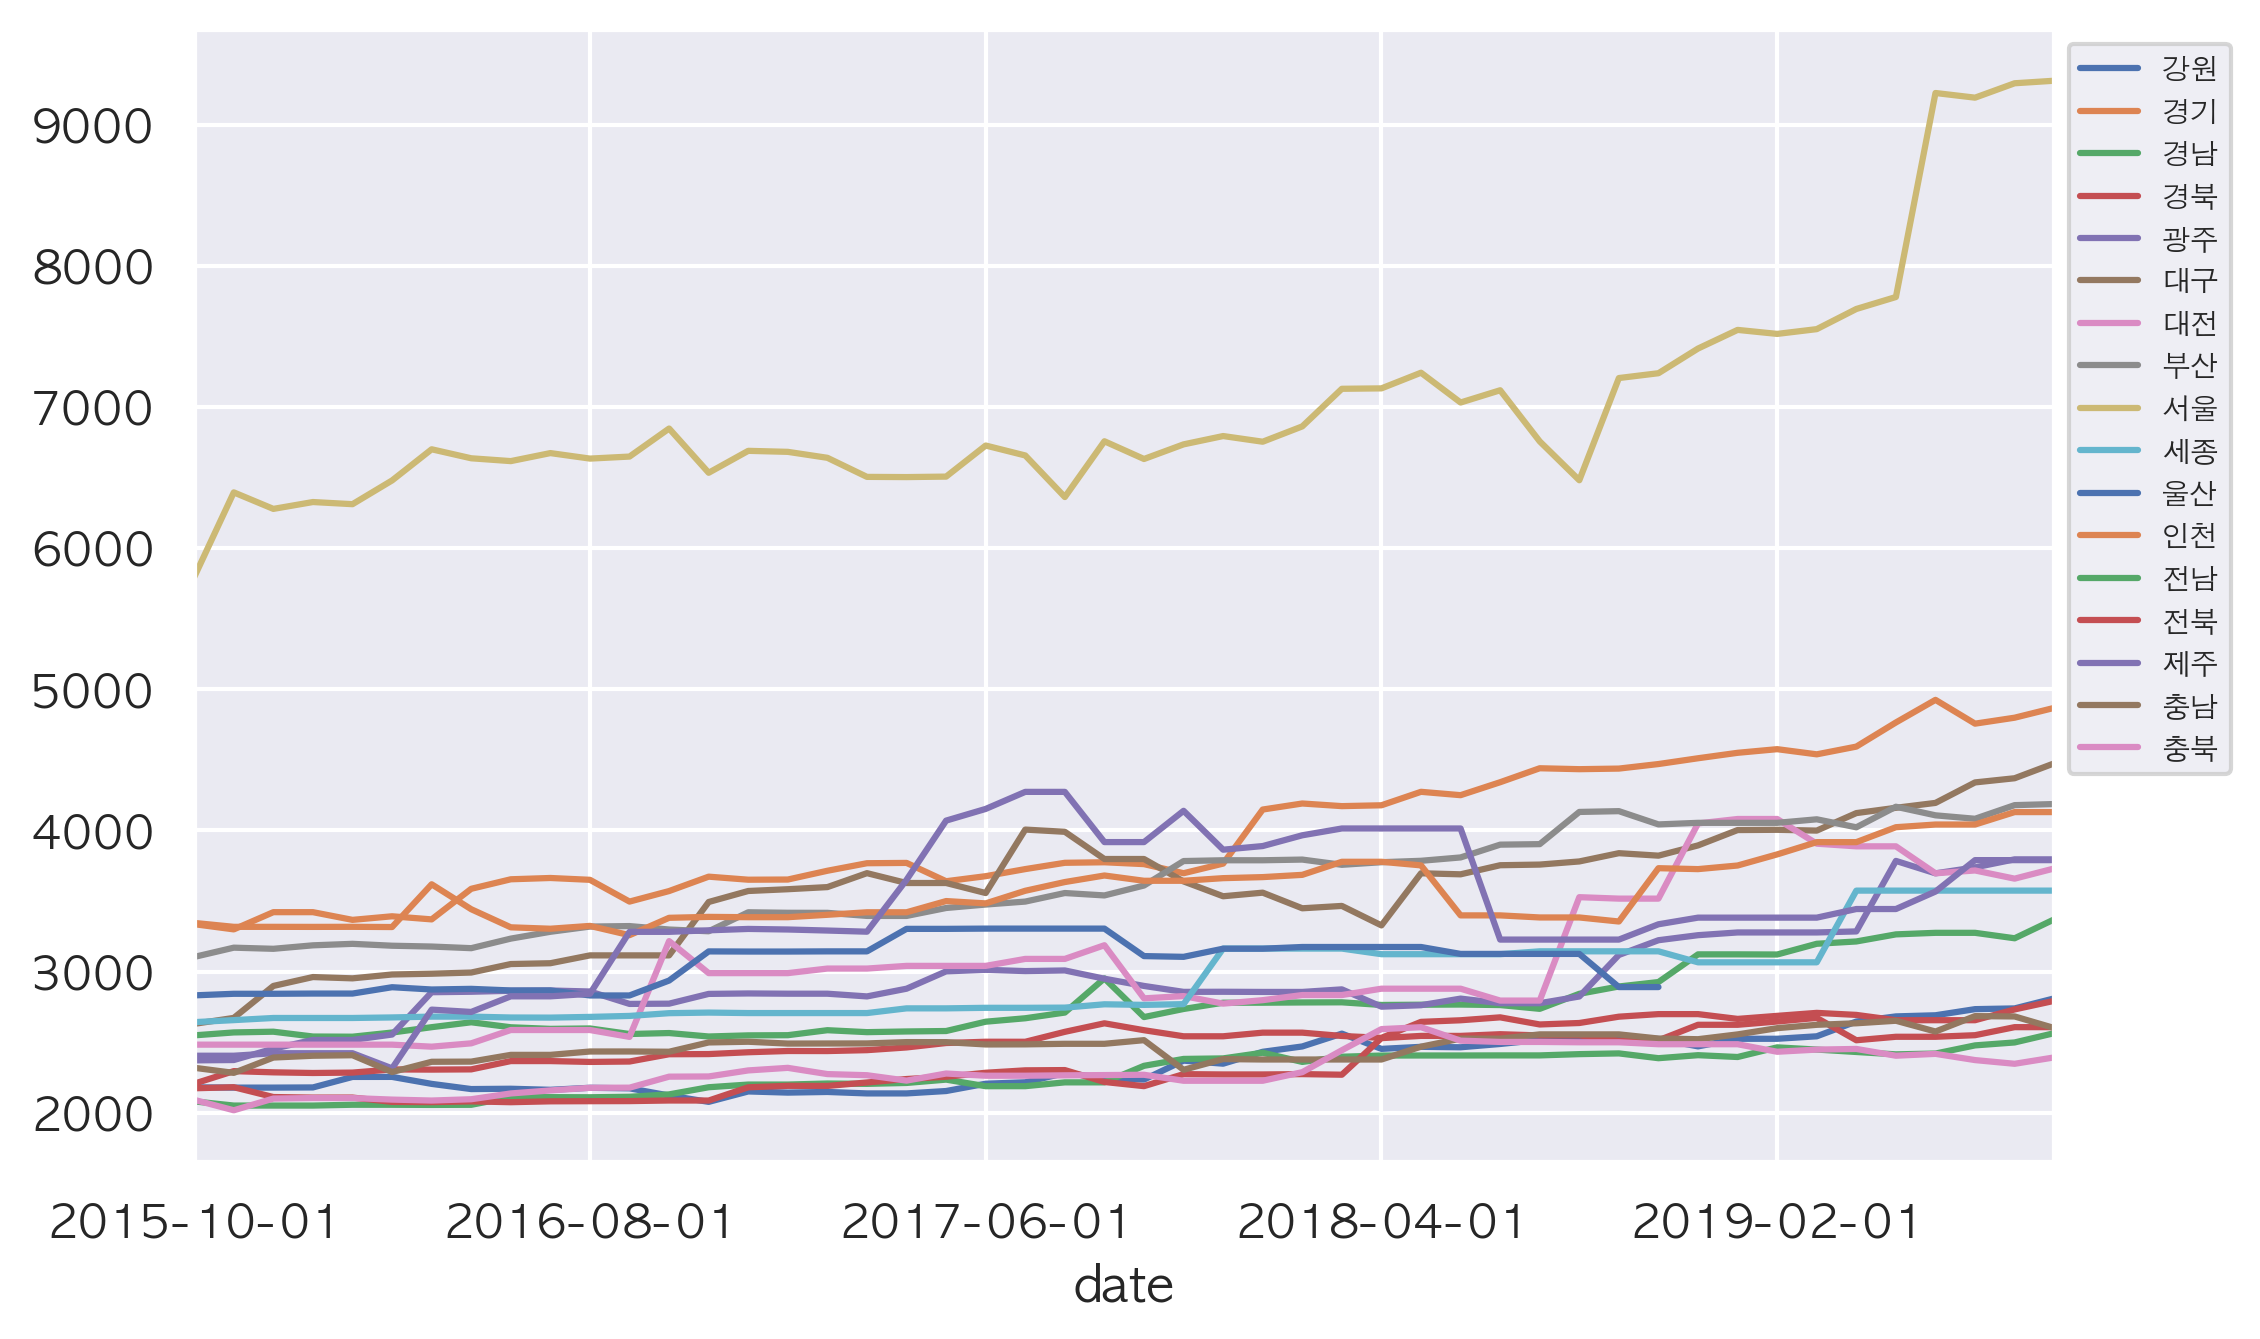

In [22]:
# 피봇 테이블을 황용한 시간의 흐름에 따른 지역별 분양가 변화 그래프
result_pv.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-small')
plt.show()

In [23]:
# 분석대상이 되는 데이터 선정
seoul_pre = house_df[(house_df["city"] == "서울")]
seoul = seoul_pre[(seoul_pre["size"] == 1) | (seoul_pre["size"] == 2) | (
    seoul_pre["size"] == 3) | (seoul_pre["size"] == 4)]
seoul = seoul[["date", "size", "cofix",
               "total_index", "origin_index", "google", "price"]]
seoul['size'] = seoul['size'].astype('int')
seoul['origin_index'] = seoul['origin_index'].astype('float')
seoul.tail()

,date,size,cofix,total_index,origin_index,google,price
3654,2019-08-01,4,1.52,105.21,105.4,15.5,8866
3726,2019-09-01,1,1.57,105.57,105.3,33.2,8205
3727,2019-09-01,2,1.57,105.57,105.3,33.2,8572
3728,2019-09-01,3,1.57,105.57,105.3,33.2,12728
3729,2019-09-01,4,1.57,105.57,105.3,33.2,8972


In [24]:
# 시계열 데이터 인덱스화
seoul["date"] = seoul["date"].apply(pd.to_datetime)
seoul.set_index("date", inplace=True)
seoul_table = seoul.copy()

In [25]:
# 기본 테이블
seoul_table.tail()

,size,cofix,total_index,origin_index,google,price
date,,,,,,
2019-08-01,4,1.52,105.21,105.4,15.5,8866
2019-09-01,1,1.57,105.57,105.3,33.2,8205
2019-09-01,2,1.57,105.57,105.3,33.2,8572
2019-09-01,3,1.57,105.57,105.3,33.2,12728
2019-09-01,4,1.57,105.57,105.3,33.2,8972


In [26]:
# 날짜 형태별 인덱스 추가
seoul["year"] = seoul.index.year
seoul["month"] = seoul.index.month
seoul["quarter"] = seoul.index.quarter
seoul_index = seoul.set_index(
    ['year', 'month', 'quarter'], drop=False).sort_index()

In [27]:
seoul_index.tail(8)

size  cofix  total_index  origin_index  google  price  \
year month quarter                                                          
2019 8     3           1   1.52       105.21         105.4    15.5   8223   
           3           2   1.52       105.21         105.4    15.5   8562   
           3           3   1.52       105.21         105.4    15.5  12728   
           3           4   1.52       105.21         105.4    15.5   8866   
     9     3           1   1.57       105.57         105.3    33.2   8205   
           3           2   1.57       105.57         105.3    33.2   8572   
           3           3   1.57       105.57         105.3    33.2  12728   
           3           4   1.57       105.57         105.3    33.2   8972   

                    year  month  quarter  
year month quarter                        
2019 8     3        2019      8        3  
           3        2019      8        3  
           3        2019      8        3  
           3        2019      8        3  
     9     3        2019      9        3  
           3        2019      9        3  
           3        2019      9        3  
           3        2019      9        3

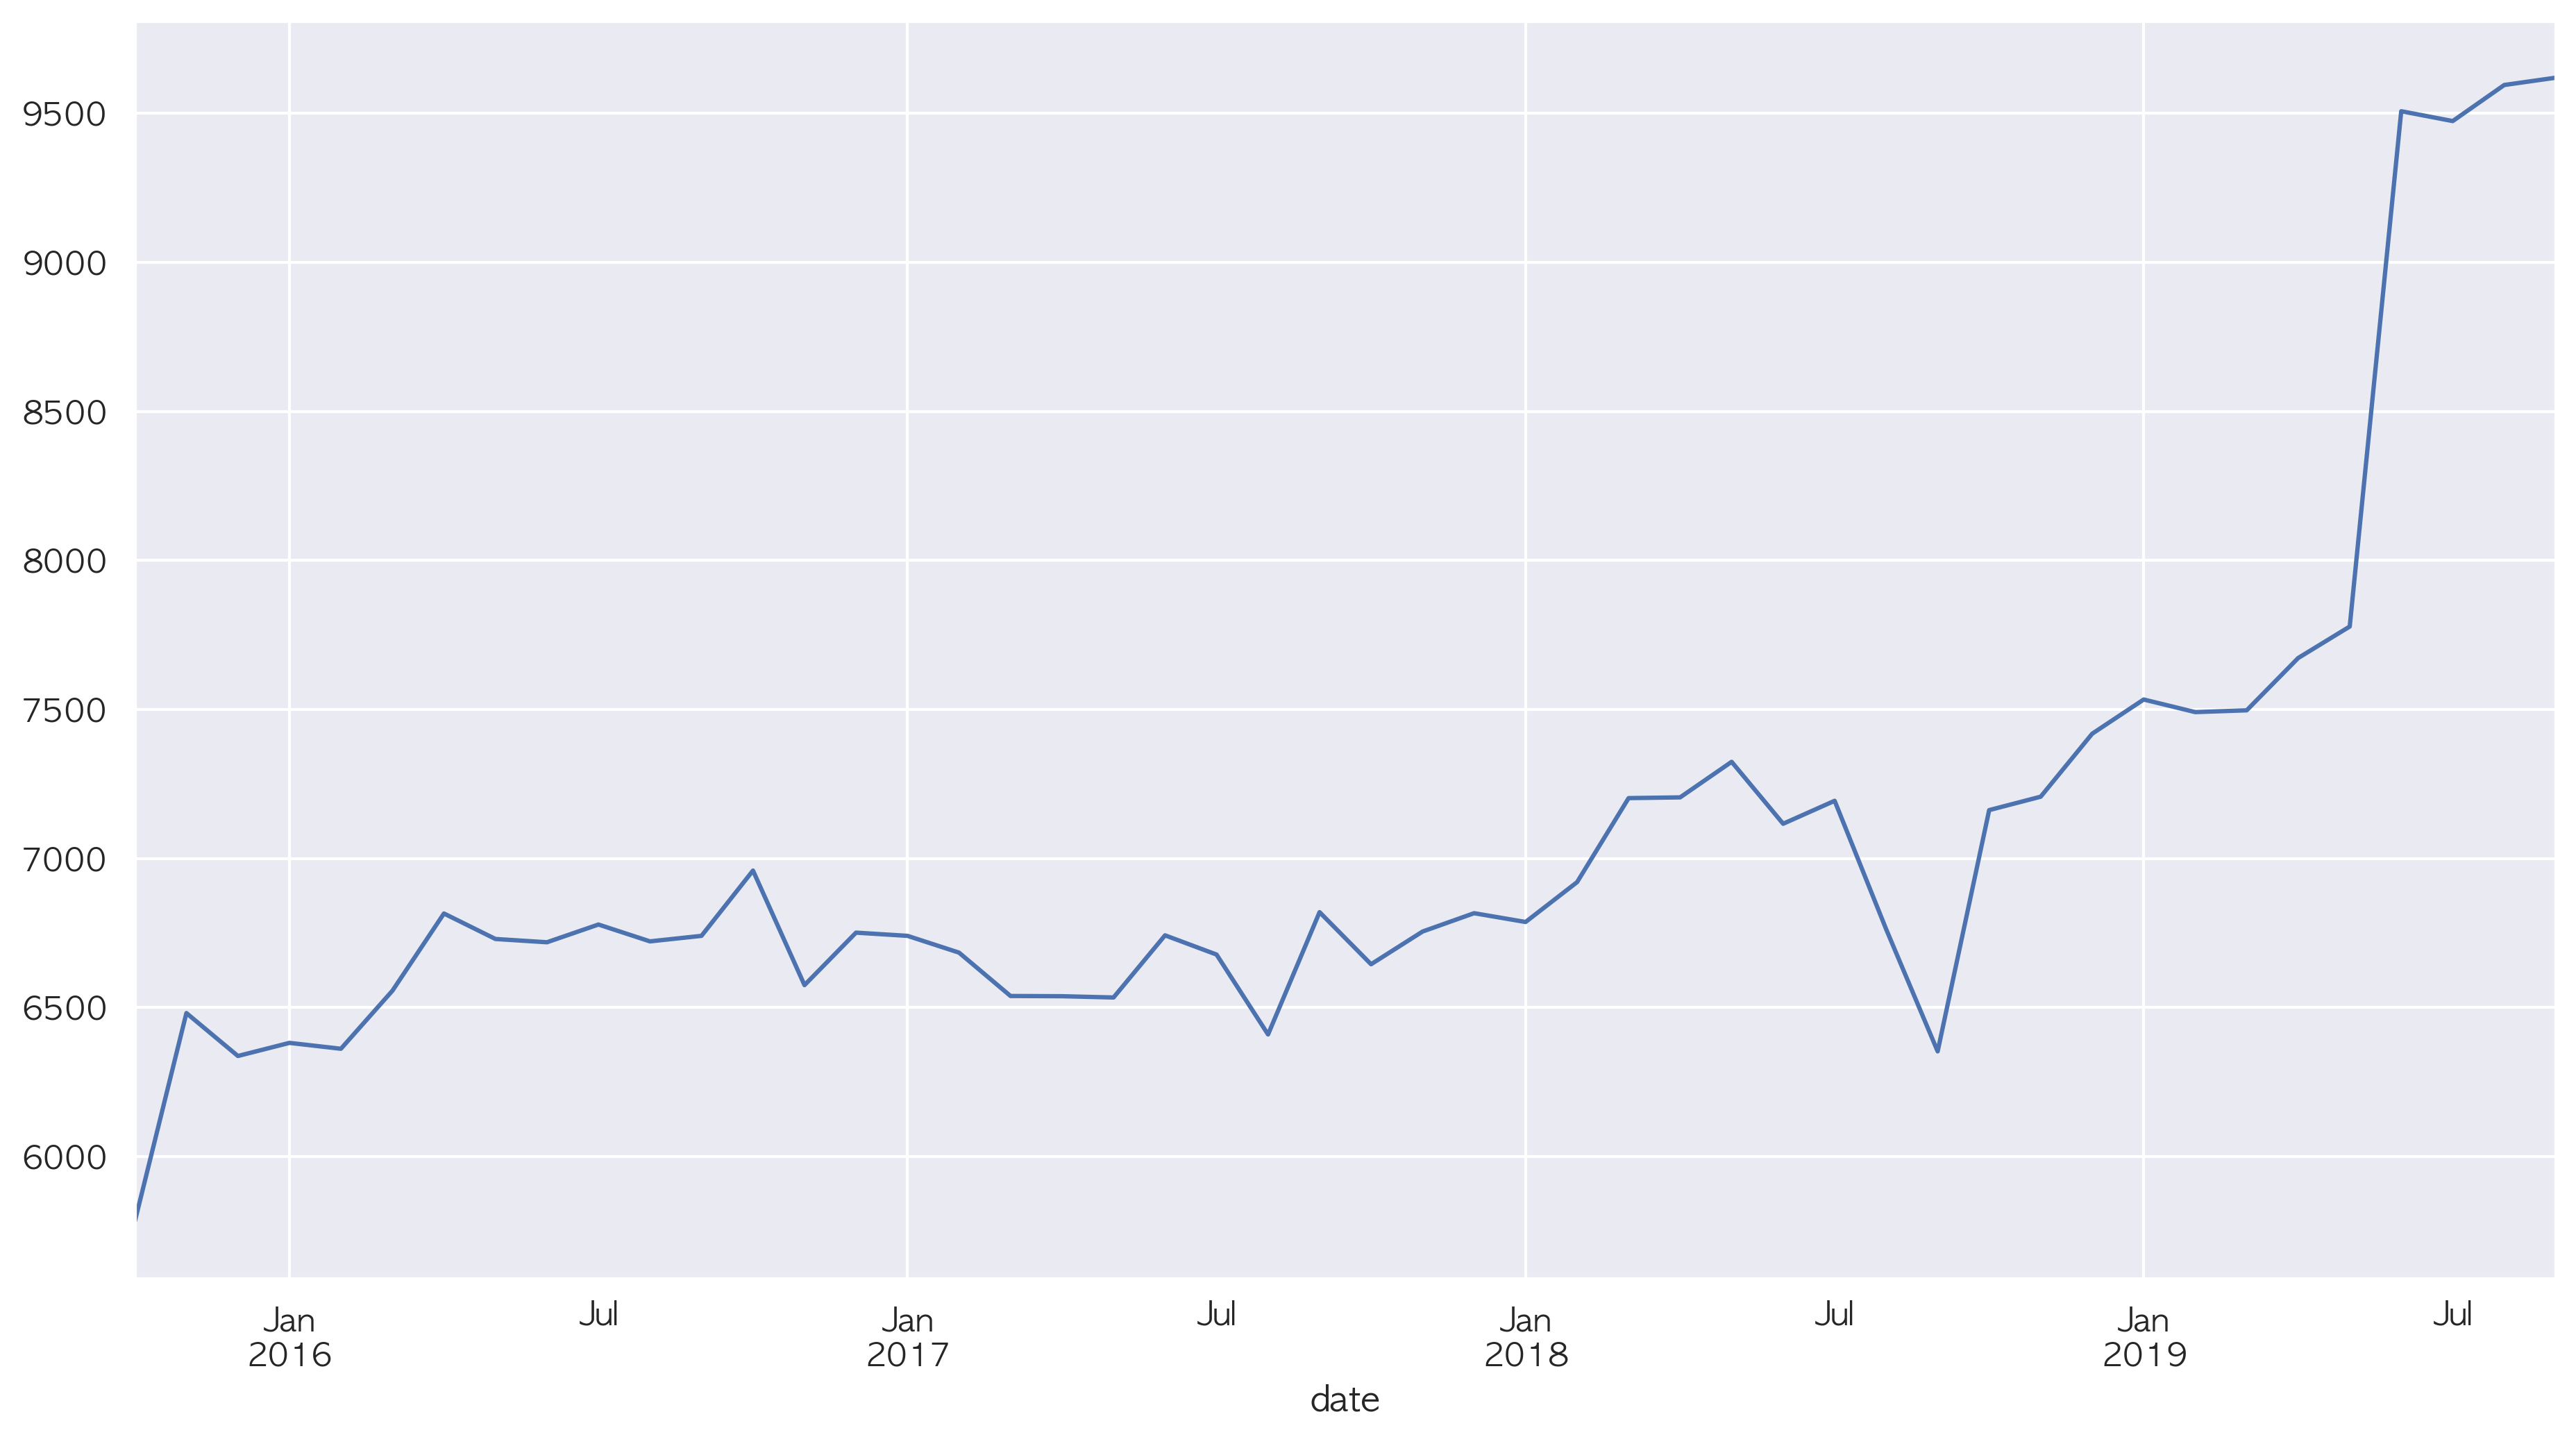

In [28]:
# datatime을 활용한 시간대별 분양가 변화 그래프
seoul_table['price'].resample('M').mean().plot(figsize=(15, 8))

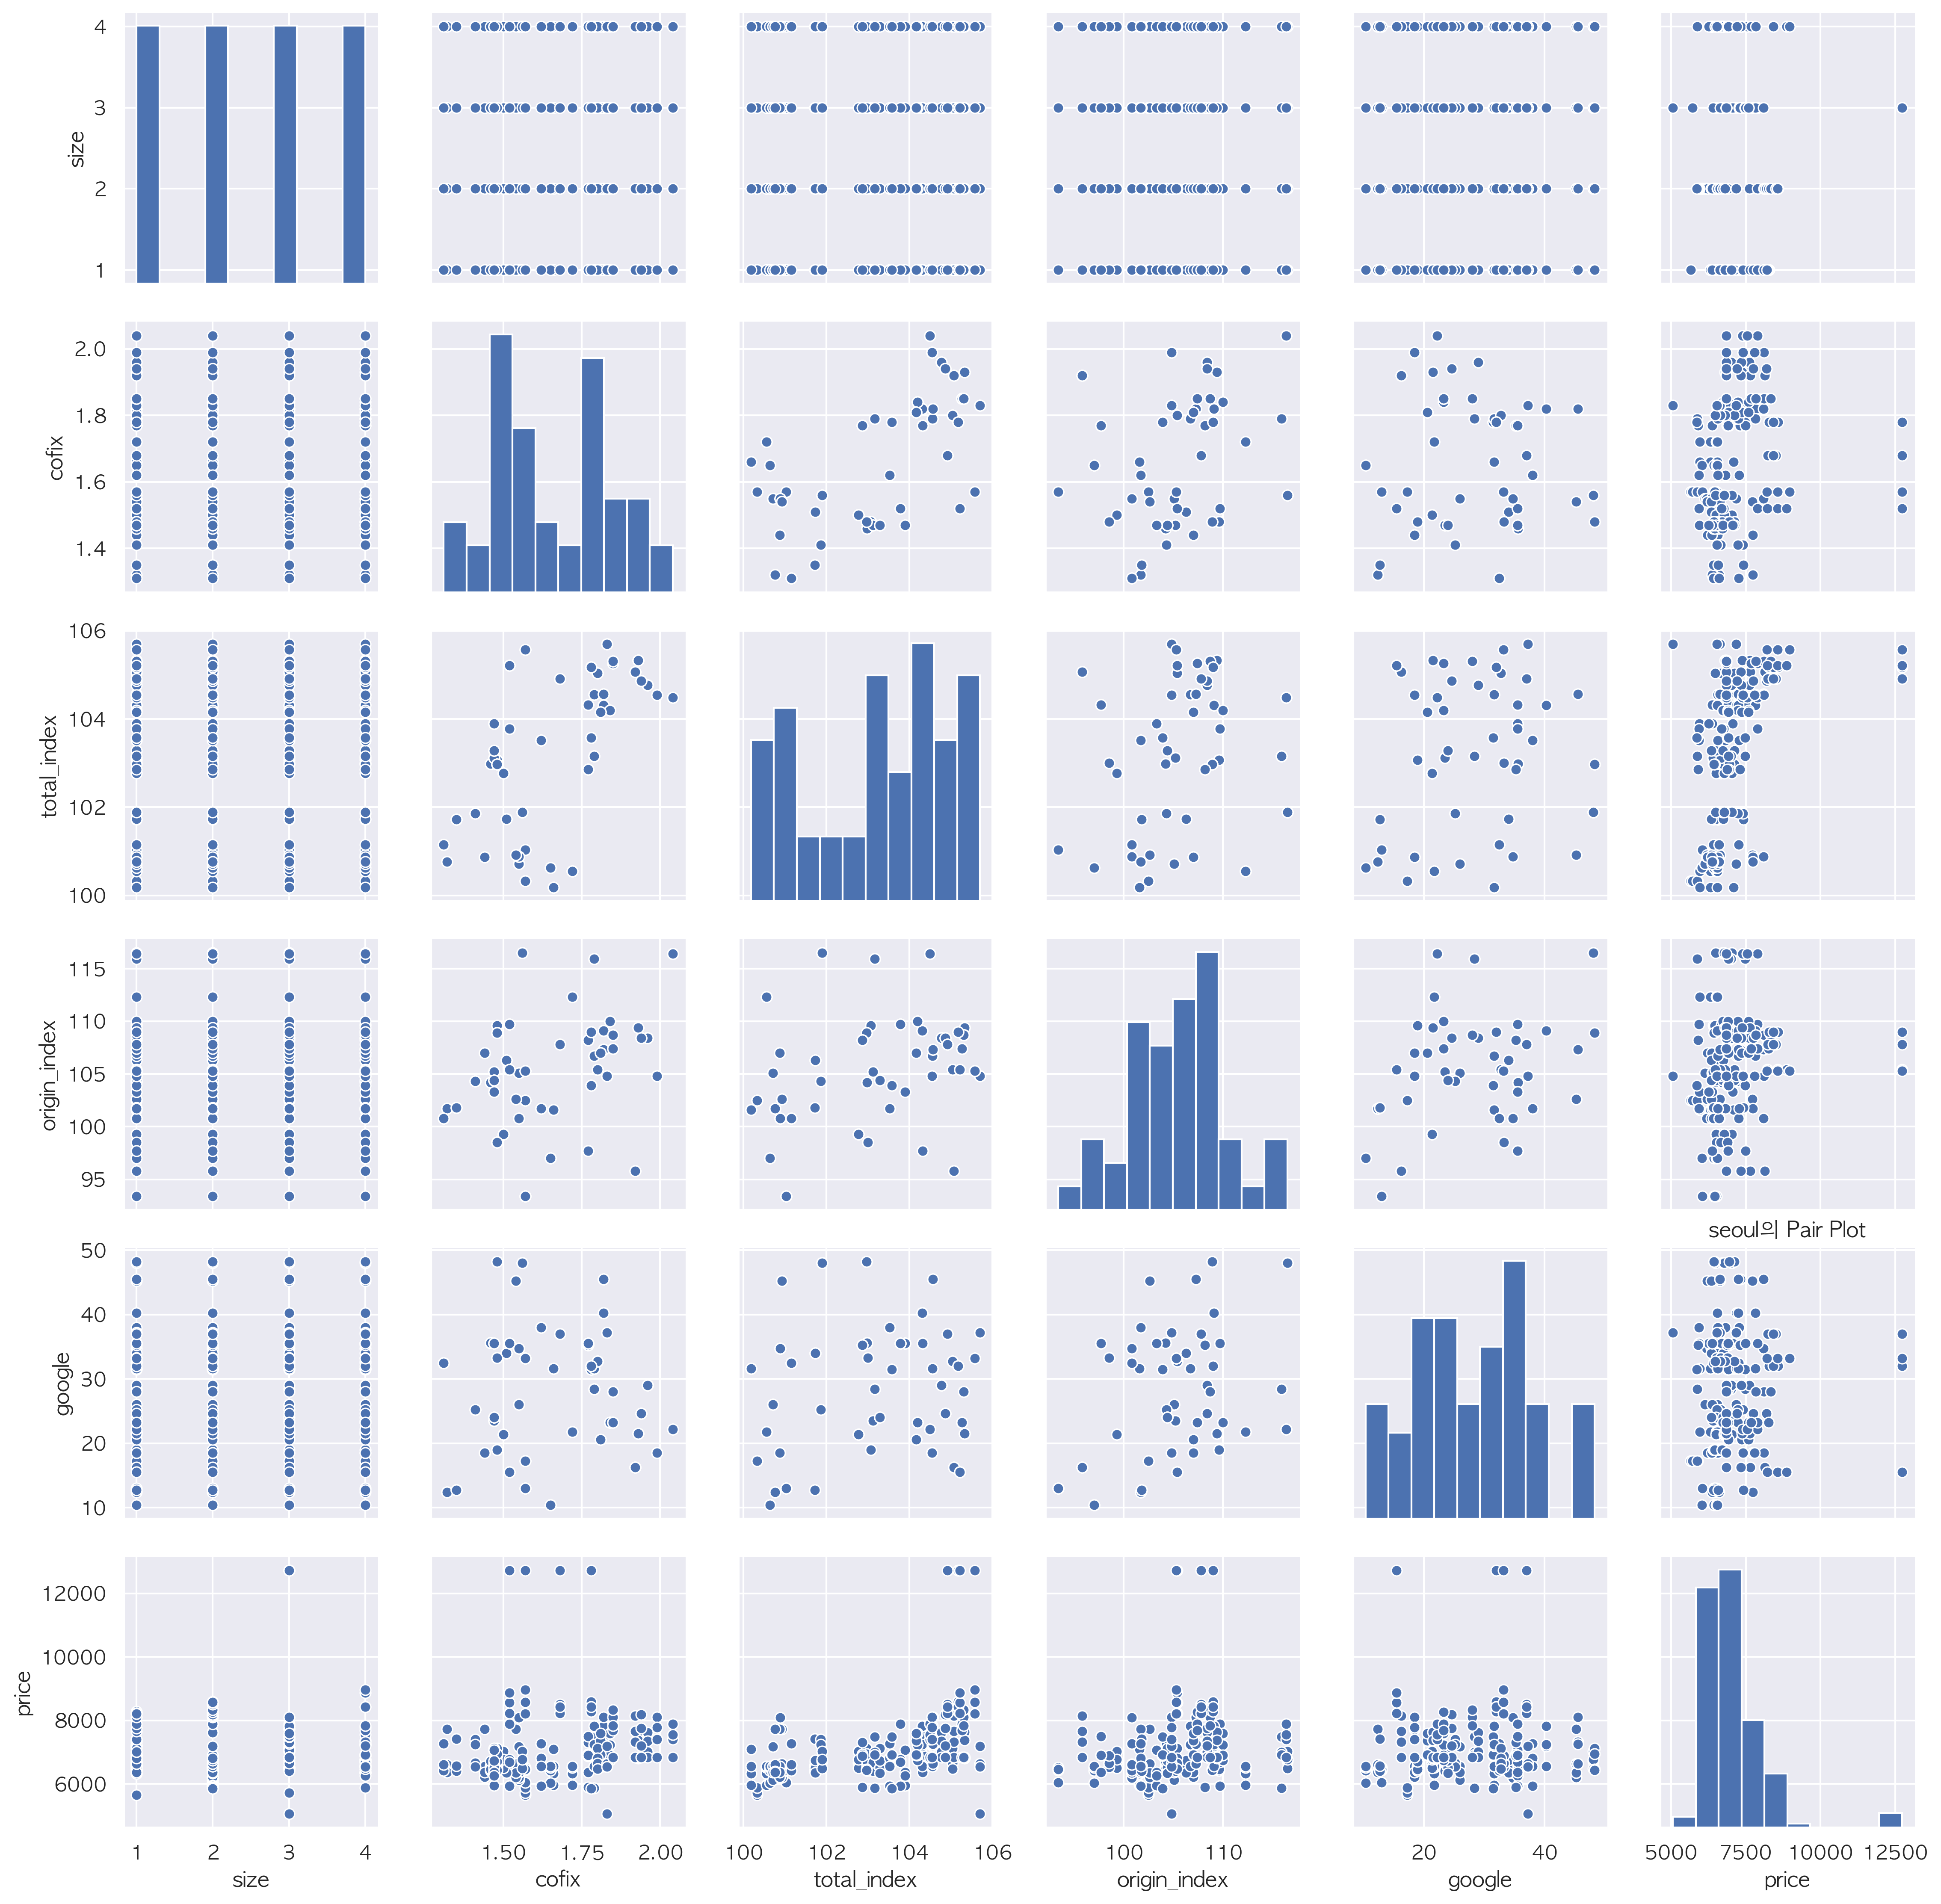

In [29]:
# 변수간 페어 플랏
sns.pairplot(seoul_table)
plt.title("seoul의 Pair Plot")
plt.show()

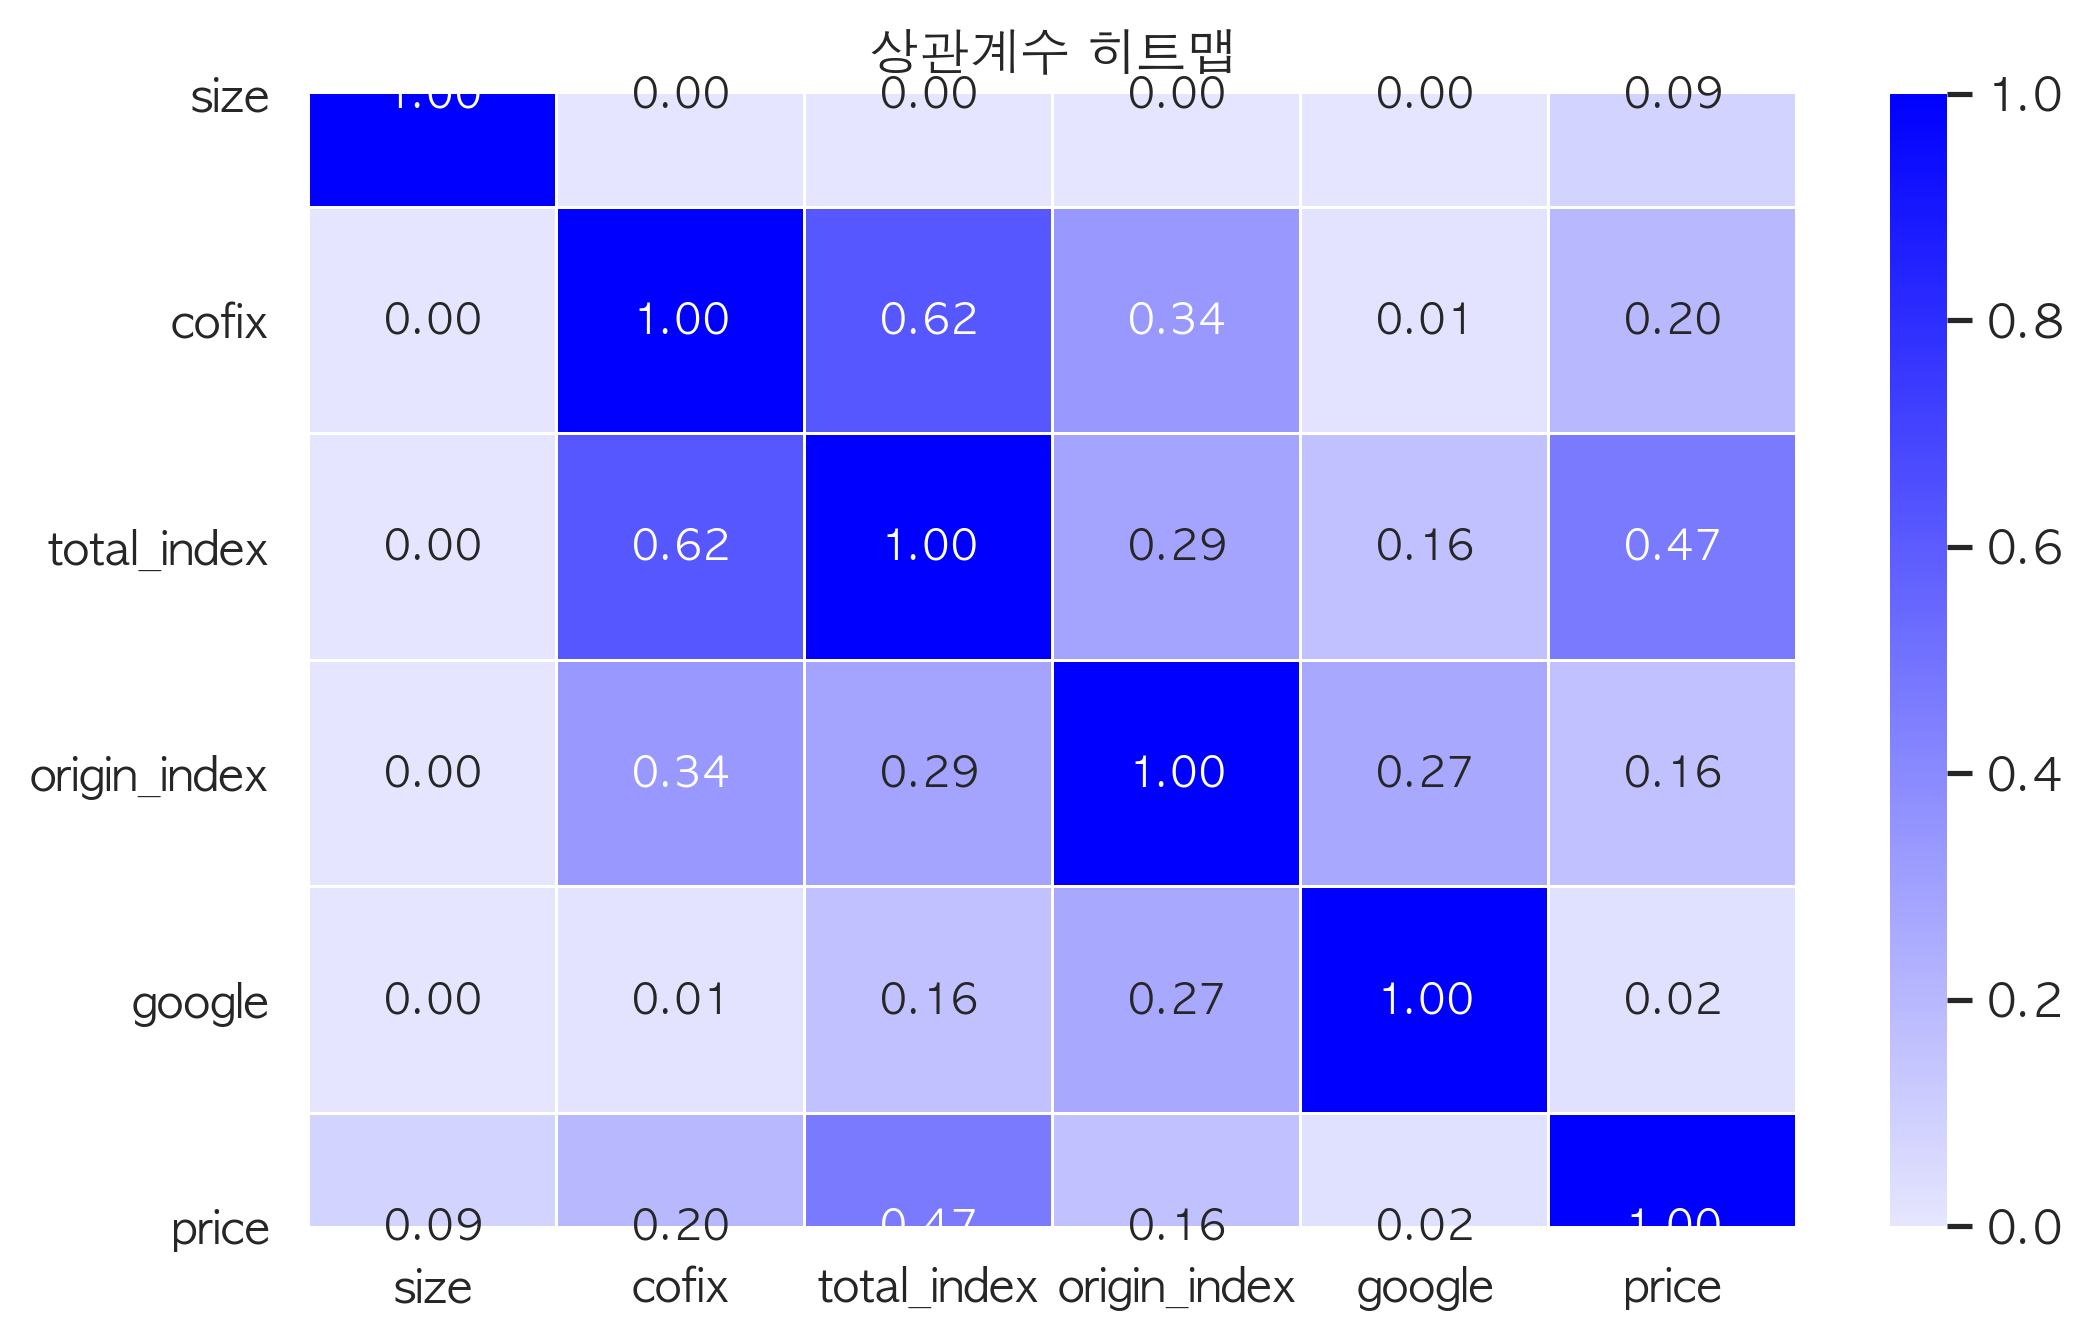

In [30]:
# 변수간 상관계수 및 히트맵
seoul_corr = seoul_table.corr()

sns.heatmap(data=seoul_corr, cmap=sns.light_palette(
    "blue", as_cmap=True), annot=True, linewidths=.5, fmt=".2f")
plt.title("상관계수 히트맵")
plt.show()

##### 부분회귀 결과

In [31]:
seoul_01 = seoul_table.iloc[:, 0:5]
seoul_X = sm.add_constant(seoul_01)
seoul_y = pd.DataFrame(seoul_table['price'], columns=["price"])

In [32]:
seoul_X.tail(2)

,const,size,cofix,total_index,origin_index,google
date,,,,,,
2019-09-01,1.0,3,1.57,105.57,105.3,33.2
2019-09-01,1.0,4,1.57,105.57,105.3,33.2


In [33]:
seoul_y.tail(2)

,price
date,
2019-09-01,12728
2019-09-01,8972


In [34]:
model_seoul = sm.OLS(seoul_y, seoul_X)
result_seoul = model_seoul.fit()

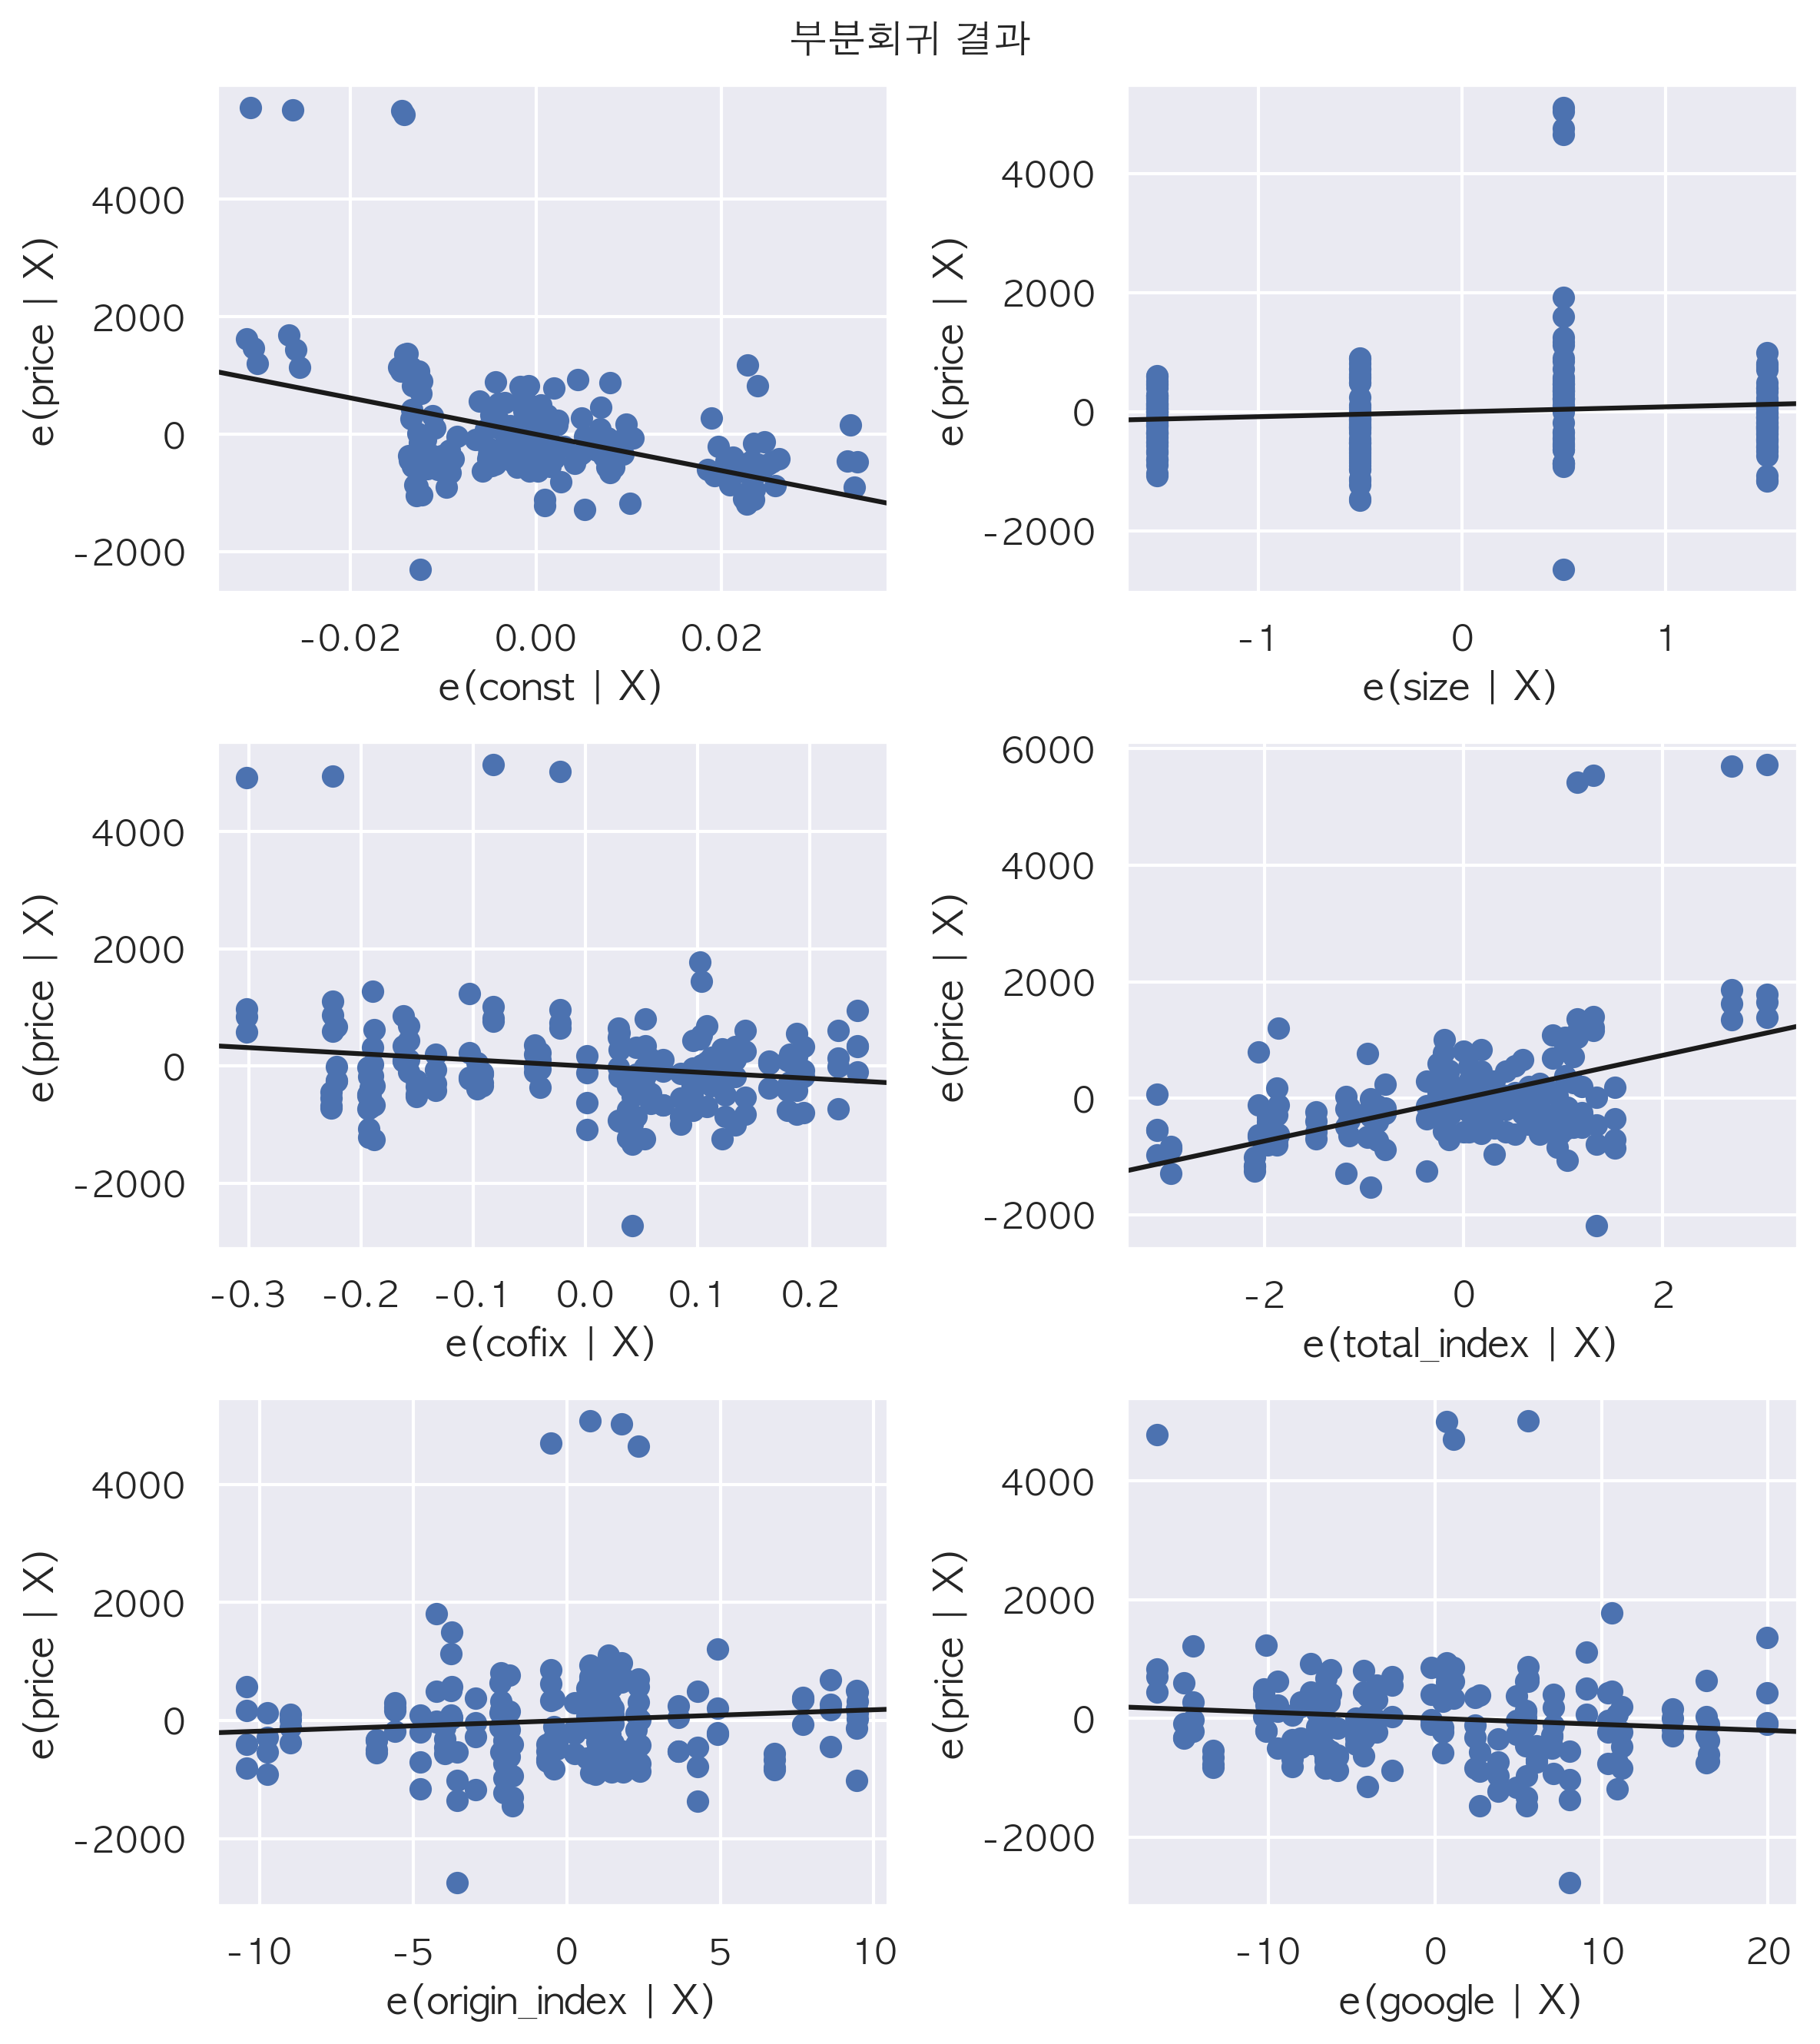

In [35]:
fig = plt.figure(figsize=(8, 9))
sm.graphics.plot_partregress_grid(result_seoul, fig=fig)
fig.suptitle("부분회귀 결과")
plt.show()

### 선형회귀모형 및 성능평가

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [37]:
def linear_model(x, y):
    train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size=0.1, random_state=1)
    model = LinearRegression(fit_intercept=True)
    # 모형 추정(상수항 결합을 자동으로 해줌)
    model = model.fit(train_x, train_y)
    # test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
    pred_y = model.predict(test_x)
    # Mean Absolute Error(MAE)
    mae = mean_absolute_error(test_y, pred_y)
    # R-Square(결정계수): 회귀분석 모델의 적합도.
    # 0~1 값을 가지는데, 1에 가까울수록 적합도가 높다
    score = model.score(test_x, test_y)
    return "예측 오차 : ", round(mae), "R-Square : ", round(score, 3)

In [38]:
a = linear_model(seoul_01, seoul_y)
a

('예측 오차 : ', 627.0, 'R-Square : ', 0.21)

### 6.2 선형회귀모형 및 성능평가

선형회귀모형 제안을 위해서 sklearn 패키지를 활용하였고, size, cofix, total_index, origin_index, google을 독립변수로 하고 price를 종속변수로 하는 회귀 모형을 제안하였다. 성능평가를 위해 평균절대대비오차(MAE)와  r-square값을 확인 하였으며 비록 만족 스러운 성능 평가('예측 오차 : ', 627.0, 'R-Square : ', 0.21)를 도출하지 못했지만 본 프로젝트의 초점이 데이터 전처리 및 시각화에 맞춰져 있다는 점을 고려하여 다른 모델 도출을 하지 않았다.